# Image Steganography (2 Bit LSB)

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import os

In [29]:
cover=cv2.imread("lena.tiff",0)

In [30]:
secret=cv2.imread("71.tiff",0)

In [32]:
secret=cv2.resize(secret,(64,64))

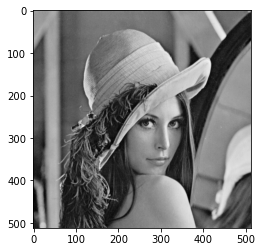

In [33]:
plt.imshow(cover,cmap='gray')
plt.show()

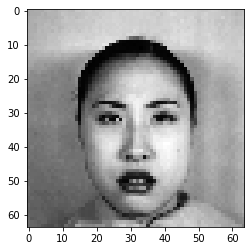

In [34]:
plt.imshow(secret,cmap='gray')
plt.show()

In [59]:
def int_to_bin(decimal):
    return ('{0:08b}'.format(decimal))

In [60]:
def bin_to_int(binary):
    return (int(binary, 2))

In [61]:
def image_to_bits(image):
    flat_data=image.flatten()
    msg=''
    for x in flat_data:
        msg=msg+int_to_bin(x)
    return msg

def bits_to_image(msg,r,c):
    l=len(msg)
    msg_im=[]
    pos=0
    while pos<l:
        msg_im.append(bin_to_int(msg[pos:pos+8]))
        pos=pos+8
    msg_im=np.reshape(msg_im,(r,c))
    return msg_im

In [65]:
def Embedding2lsb(cover,secret):
    r=cover.shape[0]
    c=cover.shape[1]
    stego=cover.flatten()
    smsg=image_to_bits(secret)
    pos=0
    l=len(smsg)
    i=0
    while pos<l:
        pix=stego[i]
        bpix=int_to_bin(pix)
        m=list(bpix)
        y=smsg[pos:pos+2]
        m[6:]=y
        n="".join(m)
        stego[i]=bin_to_int(n)
        i=i+1
        pos=pos+2
    stego=np.reshape(stego,(r,c))
    return stego   
      

In [66]:
def Extraction2lsb(stego,r,c):
    stego=stego.flatten()
    nop=r*c*4
    msg=''
    i=0
    while i<nop:
        pix=stego[i]
        bpix=int_to_bin(pix)
        bits=bpix[6:]
        msg=msg+bits
        i=i+1
    rimg=bits_to_image(msg,r,c)
    return rimg  
    
    
    

In [96]:
def mse_psnr(a,b):    
    a=a.astype('float64')
    b=b.astype('float64')
    rows,cols=a.shape
    a=a.ravel()
    b=b.ravel()
    mse=0.0
    for i in range(rows*cols):
        mse=mse+math.pow(a[i]-b[i],2)
    mse=mse/(rows*cols)   
    try:
        psnr=20 * math.log10(255.0/ math.sqrt(mse))
        return mse,psnr
    except:
        return mse,-999

In [109]:
def show_result_images(a,b,c,d):
    fig, axes = plt.subplots(nrows=1, ncols=4)
    fig.tight_layout()
    fig.set_figwidth(10)
    fig.set_figheight(2)
    plt.subplot(1,4,1)
    plt.imshow(a,'gray')
    plt.title("Original"+str(a.shape[0])+'x'+str(a.shape[1]))
    plt.subplot(1,4,2)
    plt.imshow(c,'gray')
    plt.title('DATA IMAGE'+str(c.shape[0])+'x'+str(c.shape[1]))
    plt.subplot(1,4,3)
    plt.imshow(b,'gray')
    plt.title("Stego"+str(b.shape[0])+'x'+str(b.shape[1]))
    plt.subplot(1,4,4)
    plt.imshow(d,'gray')
    plt.title('Recovered DATA'+str(d.shape[0])+'x'+str(d.shape[1]))
    #plt.savefig('plot'+imname+'___.png')
    plt.show()

In [97]:
stego=Embedding2lsb(cover,secret)

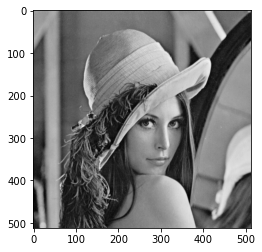

In [98]:
plt.imshow(stego,cmap='gray')
plt.show()

In [99]:
rsecret=Extraction2lsb(stego,64,64)

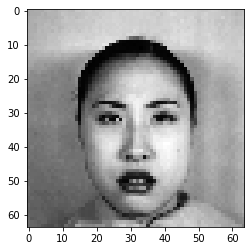

In [100]:
plt.imshow(rsecret,cmap='gray')
plt.show()

In [101]:
mse,psnr=mse_psnr(cover,stego)

In [102]:
print(mse,psnr)

0.14846420288085938 56.414586100120886


In [103]:
mse,psnr=mse_psnr(secret,rsecret)
print(mse,psnr)

0.0 -999


In [105]:
import os

In [106]:
files=os.listdir('../CoverImages')

In [107]:
files

['lena.pgm',
 'house.tiff',
 'lenaneg.pgm',
 'Barbara.tif',
 'lena.tiff',
 'Goldhill.tif',
 'peeper.tiff',
 'elaine.tiff',
 'tank.tiff',
 'fishingboat.tiff',
 'splash.tiff',
 'sailboat.tiff',
 'airplane.tiff',
 'baboon.tiff']

In [111]:
secret=cv2.imread("71.tiff",0)
secret=cv2.resize(secret,(128,128))

0.5939407348632812 50.39337248893343


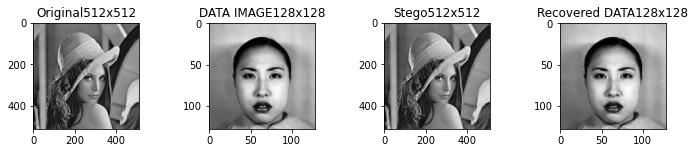

0.6053009033203125 50.311090388358565


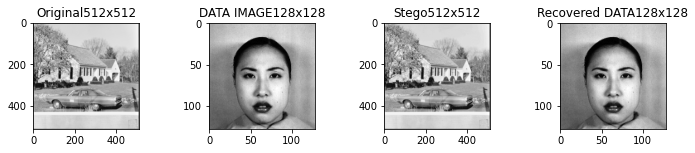

0.5933609008789062 50.39761435489694


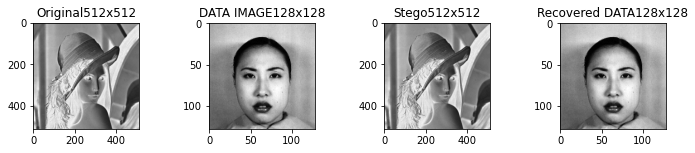

0.5941123962402344 50.39211746780123


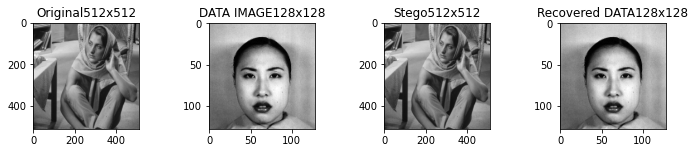

0.5962028503417969 50.376863128801965


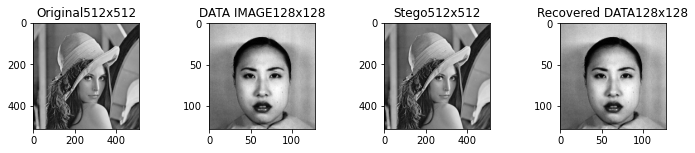

0.5881156921386719 50.436175934394925


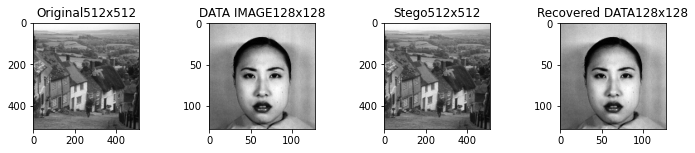

0.5878143310546875 50.4384019079838


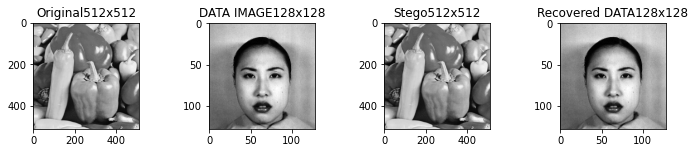

0.5999259948730469 50.34982680485161


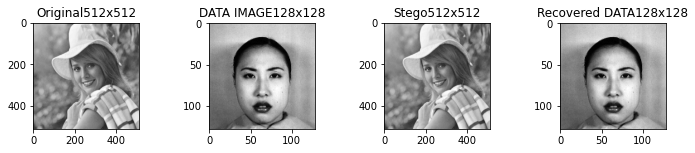

0.6046981811523438 50.315416985571375


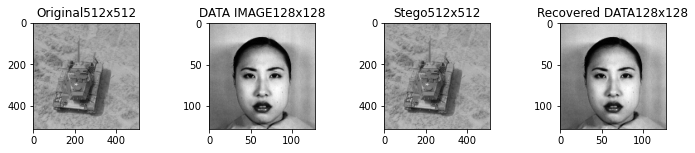

0.6116218566894531 50.26597364065472


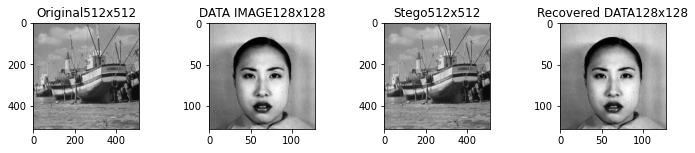

0.59393310546875 50.393428276068946


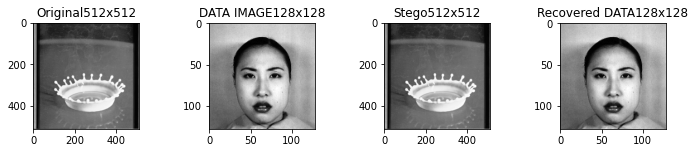

0.5926895141601562 50.402531170820154


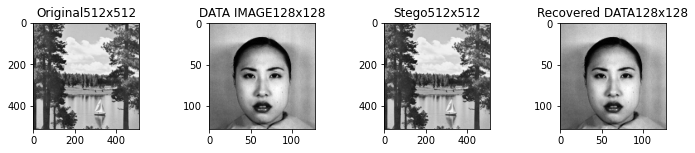

0.5981521606445312 50.36268685036048


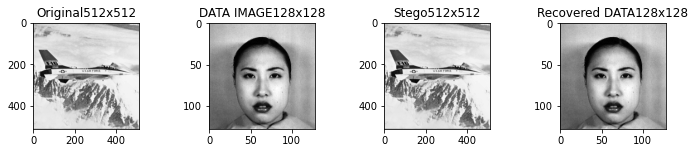

0.59271240234375 50.402363460414115


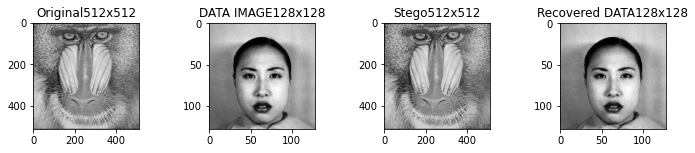

In [113]:
p=[]
m=[]
for fname in files:
    cover=cv2.imread('../CoverImages/'+fname,0)
    stego=Embedding2lsb(cover,secret)
    rsecret=Extraction2lsb(stego,128,128)
    mse,psnr=mse_psnr(cover,stego)
    p.append(psnr)
    m.append(mse)
    print(mse,psnr)
    show_result_images(cover,stego,secret,rsecret)
    